import wfdb


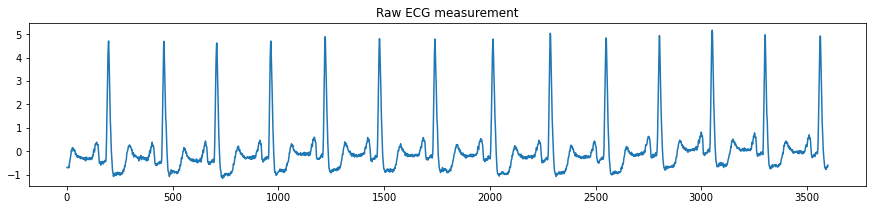

In [81]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
# raw
import wfdb
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
sig, fields = wfdb.rdsamp('mit-bih-arrhythmia-database-1.0.0/105',sampto=3600,channels=[0]) 
sig = scale(sig).astype('float32')
unfiltered_signal = sig[:, 0]
plt.figure(figsize=(15,3))
plt.title("Raw ECG measurement")
plt.plot(unfiltered_signal)
plt.show()

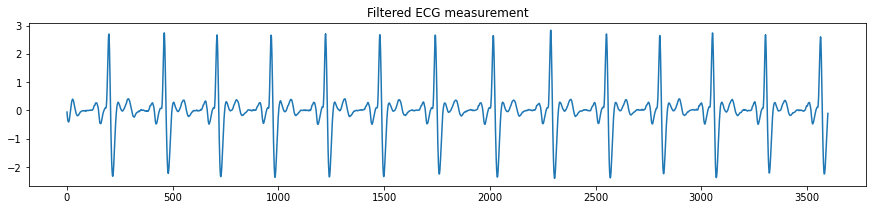

In [82]:
# Band bass filter  
fs = 360
f1 = 5/fs
f2 = 15/fs
b, a = signal.butter(1, [f1*2, f2*2], btype='bandpass')
filtered_ecg = signal.lfilter(b, a, unfiltered_signal)
plt.figure(figsize=(15,3))
plt.plot(filtered_ecg)
plt.title("Filtered ECG measurement")
plt.show()

Derivation (differentiation)

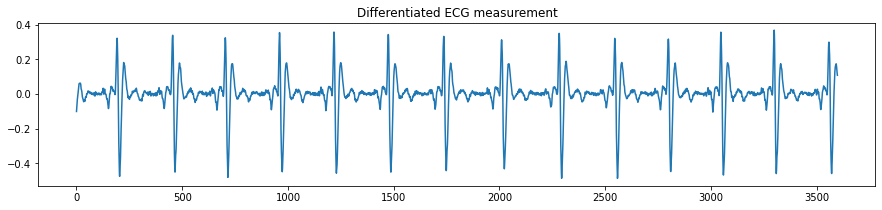

In [83]:
# Derivation (differentiation
diff = np.diff(filtered_ecg) 
plt.figure(figsize=(15,3))
plt.plot(diff)
plt.title("Differentiated ECG measurement")
plt.show()

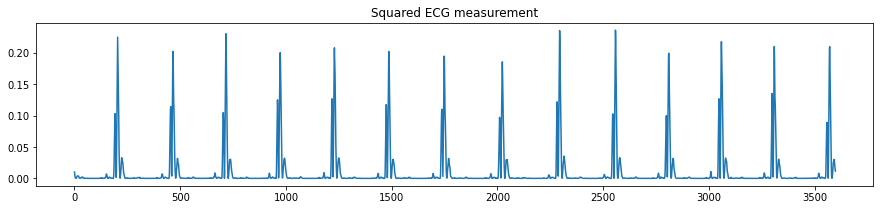

In [84]:
# Squared
squared = diff*diff
plt.figure(figsize=(15,3))
plt.plot(squared)
plt.title("Squared ECG measurement")
plt.show()

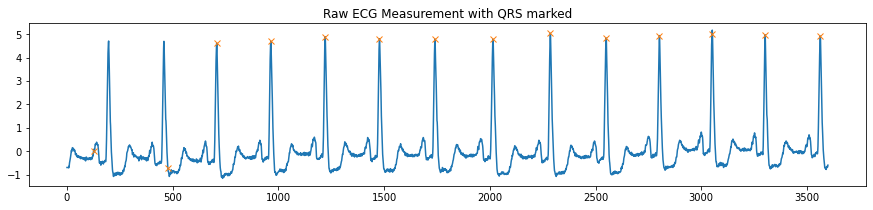

In [85]:
# Peak detection
from test import panPeakDetect, MWA_from_name
N = int(0.12*fs)
mwa = MWA_from_name("cumulative")(squared, N)
mwa[:int(0.2*fs)] = 0
mwa_peaks = panPeakDetect(mwa, fs)
plt.figure(figsize=(15,3))
plt.plot(unfiltered_signal)
plt.plot(mwa_peaks, unfiltered_signal[mwa_peaks], "x")
plt.title("Raw ECG Measurement with QRS marked")
plt.show()